## Task 1

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
%matplotlib inline

In [8]:
from sklearn.datasets import load_boston

In [10]:
boston = load_boston()

In [11]:
data = boston["data"]

feature_names = boston["feature_names"]
X = pd.DataFrame(data, columns=feature_names)

target = boston["target"]
Y = pd.DataFrame(target, columns=["price"])

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [16]:
from sklearn.manifold import TSNE

In [19]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

C:\Programming\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


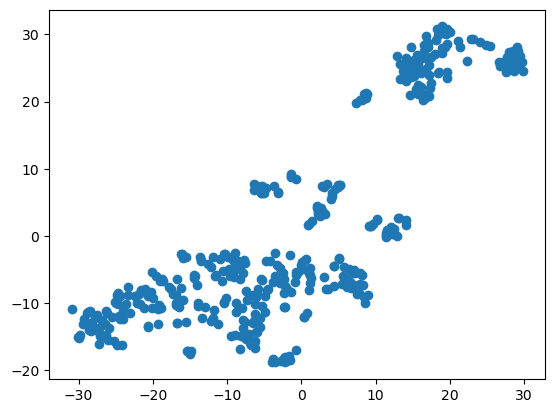

In [23]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

In [24]:
X_test_tsne = tsne.fit_transform(X_test_scaled)

C:\Programming\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


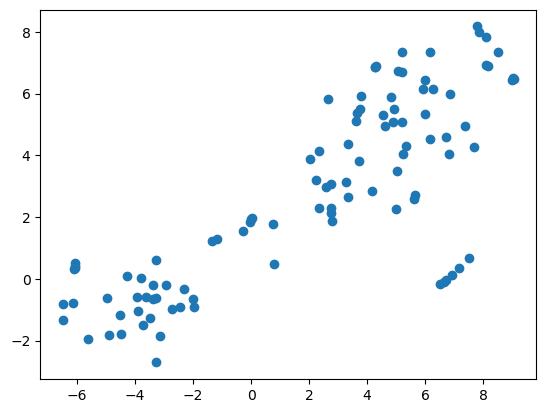

In [25]:
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1])
plt.show()

## Task 2

In [21]:
from sklearn.cluster import KMeans

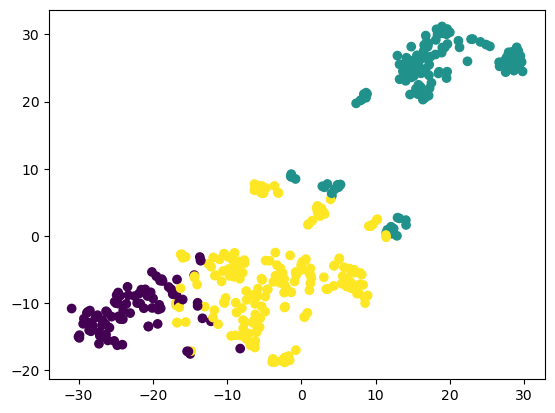

In [22]:
model = KMeans(n_clusters=3, random_state=42, max_iter=100)
labels_train = model.fit_predict(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.show()

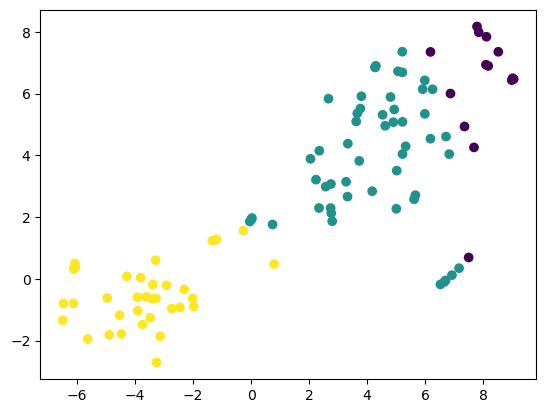

In [26]:
labels_test = model.fit_predict(X_test_scaled)

plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_test)
plt.show()

In [28]:
print('Первый кластер: ', y_train[labels_train == 0].mean())
print('Второй кластер:', y_train[labels_train == 1].mean())
print('Третий кластер:', y_train[labels_train == 2].mean())

Первый кластер:  price    27.788372
dtype: float64
Второй кластер: price    16.165354
dtype: float64
Третий кластер: price    24.958115
dtype: float64


In [29]:
print('Первый кластер: ', X_train['CRIM'][labels_train == 0].mean())
print('Второй кластер:', X_train['CRIM'][labels_train == 1].mean())
print('Третий кластер:', X_train['CRIM'][labels_train == 2].mean())

Первый кластер:  0.07356558139534886
Второй кластер: 10.797028425196853
Третий кластер: 0.42166020942408367


In [38]:
print('Первый кластер: ', y_test[labels_test == 0].mean())
print('Второй кластер:', y_test[labels_test == 1].mean())
print('Третий кластер:', y_test[labels_test == 2].mean())

Первый кластер:  price    33.871429
dtype: float64
Второй кластер: price    21.55283
dtype: float64
Третий кластер: price    16.437143
dtype: float64


In [41]:
print('Первый кластер: ', y_train['CRIM'][labels_test == 0].mean())
print('Второй кластер:', y_train['CRIM'][labels_test == 1].mean())
print('Третий кластер:', y_train['CRIM'][labels_test == 2].mean())

KeyError: 'CRIM'